#### Loading Libraries

In [29]:
%matplotlib inline

import glob
import networkx as nx
import pandas as pd

#### Load Dataset

The Nest class in the *termite* module provides tools for preprocessing a tracking result dataset, we'll assume that the data was generated using this process from now on.

Let's proceed to load the data then...

In [2]:
def load_dataset(datapath):
    dataset = []
    for table in sorted(glob.glob(datapath)):
        dataset.append(pd.read_csv(table))
    return dataset

dataset = load_dataset('../data/Clustering/expanded/*.csv')

This gives us a list of Pandas dataframes containg each termite data, from now on we can further investigate the underlying structure of termite self organization.

#### Instant Encounter Graph

To get a better intuition over how to represent the termites' network, let's first build a graph showing the encounters of a termite in a given frame. We'll do this in very generalized way so we can come back and use this code in the future if it's necessary.

In [25]:
def build_encounter_graph(focal_termite, frame):
    frame_data = dataset[focal_termite].loc[frame]
    G = nx.Graph()
    G.add_node(focal_termite+1)
    for termite_number in range(1, len(dataset)+1):
        if termite_number-1 != focal_termite:
            if frame_data.loc['interaction_with_t{}'.format(termite_number)] != 'no-interaction':
                G.add_node(termite_number)
                G.add_edge(focal_termite+1 ,termite_number)
    return G    

Now we can retrieve the encounters of a focal termite specifying his position in the *dataset* list and which frame should be investigated, for example, let's check the encounter of the termite with label *t1* (position zero in the dataset list) in the 100th frame:

In [32]:
encounters = build_encounter_graph(0, 50000)

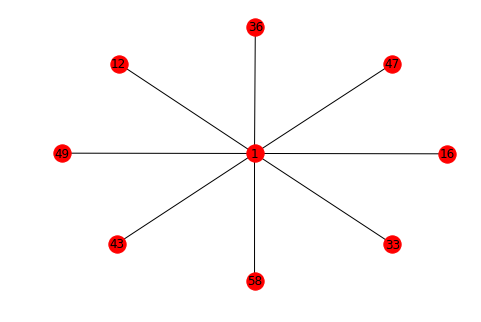

In [33]:
nx.draw(encounters, with_labels=True)